# Comparison of Low-Resolution Cicle3 arxiv

### Content


1. [The load of packages, modules, and data](#1-load-of-packages-modules-and-data)

2. [Comparison of Histograms](#2-comparison-of-histograms)

4. [Tropical Mean Comparison](#3-mean-comparison)

5. [The bias between models and observations](#4-calculation-of-a-bias-between-climatological-model-and-observations)

[Go to the end of file](#the-end)

The current and future capabilities of the diagnostic:

|  | Implemented | Nessesety |
| --- | --- | --- |
| Histograms  (counts, frequencies, pdf, etc)| +  | |
| mean (glob, along latitude, longitude and etc) | + |  |
| bias | + |  |
| daily variability | + | ? |
|  95% level | + | ? |
| Corellation of tprate montly variation and total cloud cover, 2t and etc  | - | ? |
| Analyse of convective ranfall distributions (clustering and etc)  | - | ? |
| Stanart deviation map per season  | - | ? |

+ Comparison with GPM-hourly

Ideas for aqua
|  | Implemented | Nessesety |
| --- | --- | --- |
| Perfomance measuents through magic functions| +/-  | ? |
| Precompiling techniques of aqua |  | ? |

#

## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../')
from tropical_rainfall import Tropical_Rainfall

In [34]:
diag = Tropical_Rainfall(trop_lat=15,  num_of_bins = 5000, first_edge = 0, loglevel='warning')

In [35]:
lumi=True

# Please change the path to the NetCDF files and the PDF files to your own path
if lumi:
    path_to_netcdf = "/users/nazarova/work/output/NetCDF/histograms/"
    path_to_mean = "/users/nazarova/work/output/NetCDF/mean/"
    path_to_pdf = '/users/nazarova/work/output/PDF/'
else:
    path_to_netcdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/histograms/"
    path_to_mean = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/mean/"
    path_to_pdf = "/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/"

new_unit = 'mm/day'
diag.width_of_bin = diag.precipitation_rate_units_converter(0.2, old_unit='mm/day', new_unit=new_unit)

load_observation = False

##### Loading the low-resolution arxiv 

In [ ]:
if lumi:
    reader  = Reader(model="IFS", exp="historical-1990-devcon", source="lra-r100-monthly") 
    ifs_1990_devcon = reader.retrieve(var=["tprate"])
    
    reader                  = Reader(model="IFS", exp="control-1950-devcon", source="lra-r100-monthly")
    control_1950_devcon     = reader.retrieve(var=["tprate"])
else:
    reader  = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly")
    ifs_tco2559_ng5    = reader.retrieve(var=["tprate"])

    reader          = Reader(model="ICON", exp="ngc3028", source="lra-r100-monthly")
    icon_ngc3028    = reader.retrieve(var=["tprate"])

    reader                  = Reader(model="IFS", exp="tco1279-orca025-cycle3", source="lra-r100-monthly")
    ifs_tco1279_orca025     = reader.retrieve(var=["tprate"])
    #ifs_tco1279_orca025 = ifs_tco1279_orca025.dropna(dim='time')
    
if load_observation:
    reader                  = Reader(model="MSWEP", exp="past", source="monthly", regrid = "r100")
    mswep_mon               = reader.retrieve(regrid=True, var=["tprate"]) 

    reader                  = Reader(model="ERA5", exp="era5", source="monthly", regrid = "r100")
    era5_mon                = reader.retrieve(regrid=True, var=["tprate"])

    mswep_mon_2015_2020 = mswep_mon.sel(time=slice('2015', '2020'))
    mswep_mon_1979_1985 = mswep_mon.sel(time=slice('1979', '1985'))

    era5_mon_1950_1959 = era5_mon.sel(time=slice('1950', '1959'))
    era5_mon_2015_2022 = era5_mon.sel(time=slice('2015', '2022'))
    

In [ ]:
if lumi:
    lra_data = {
                'historical_1990': {'data': ifs_1990_devcon, 'label': 'ifs_historical-1990-devcon'},
                'control_1950': {'data': control_1950_devcon, 'label': 'ifs_control-1950-devcon'},            
            }
else:
    lra_data = {
                'mswep': {'data': mswep_mon, 'label': 'mswep'},
                'era5': {'data':era5_mon, 'label': 'era5'},
                'ifs_tco2559': {'data': ifs_tco2559_ng5, 'label': 'ifs_tco2559'},
                'ifs_tco1279': {'data': ifs_tco1279_orca025, 'label': 'ifs_tco1279'},    
                'icon': {'data': icon_ngc3028, 'label': 'icon_ngc3028'},           
            }


In [ ]:
## Apply unit fix always inside the functions

### Initialization of the tropical-rainfall diagnostic

The class attributes are:
- The latitude band of the tropical area: **trop_lat=15**     
    
- The number of bins in the histogram: **num_of_bins=20**
    
- The left edge of the first bin: **first_edge=0** 
    
- The width of each bin: **width_of_bin**     
    

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
histograms = {}
for key, value in lra_data.items():
    histograms[key] = diag.histogram(value["data"], 
                                     new_unit=new_unit,  path_to_histogram=path_to_netcdf, name_of_file=value["label"])

In [ ]:
histograms['historical_1990']

## check the function

In [ ]:
P95_seasonal = {}
for key, value in lra_data.items():
    P95_seasonal[key] = diag.seasonal_095level_into_netcdf(value["data"], new_unit=new_unit, path_to_netcdf=path_to_netcdf, 
                                                           name_of_file=value["label"])

In [ ]:
P95_level = {}
for key, value in lra_data.items():
    P95_level[key] = diag.get_95percent_level(value["data"], new_unit=new_unit)

In [33]:
P95_level['historical_1990'], P95_level['control_1950'], 

((8.614227294921875, 'mm/day', 0.9490217757054271),
 (6.093544006347656, 'mm/day', 0.9459930577539689))

## 2. Comparison of histograms

##### All output of the diagnostic is in the format of NetCDF or PDF.
##### The paths to the repositories, where the diagnostic store the output, set above.

##### The diagnostic can provide us with a graphical comparison of the obtained histograms.  
##### Below we compare the precipitation pdf with the units `mm/day` (set above).

In [31]:
if lumi:
    load_lra_analyse = {
                'historical_1990': {'path': path_to_netcdf+"trop_rainfall_ifs_historical-1990-devcon_histogram_0-0_1000-0_5000_1990-01-01T00_1990-12-01T00_M.nc", 
                                    'label': 'ifs_historical-1990-devcon'},
                'control_1950': {'path': path_to_netcdf+"trop_rainfall_ifs_control-1950-devcon_histogram_0-0_1000-0_5000_1950-01-01T00_1959-12-01T00_M.nc", 'label': 'ifs_control-1950-devcon'},            
            }

load_lra_analyse = diag.update_dict_of_loaded_analyses(loaded_dict=load_lra_analyse)

In [ ]:
preindustrial=False
if not lumi:
    if preindustrial:
        load_lra_analyse = {
            'ifs_control_1950': {'path': path_to_netcdf+'IFS/control_1950_devcon/trop_rainfall_control_1950_devcon_lra_r100_monthly_1950-01-01T00_1959-12-01T00_histogram.nc',
                                    'label': 'ifs_control_1950'},
            'ifs_historical_1990': {'path': path_to_netcdf+'IFS/historical_1990_devcon/trop_rainfall_historical_1990_devcon_lra_r100_monthly_1990-01-01T00_1990-12-01T00_histogram.nc',
                                    'label': 'ifs_historical_1990'},
            'mswep_mon_1979_1985': {'path': path_to_netcdf+'MSWEP/trop_rainfall_mswep_past_monthly_1979_1985_r100_1979-02-01T00_1985-12-01T00_histogram.nc',
                                    'label': 'mswep_mon_1979_1985'},
            'era5_1950_1959': {'path': path_to_netcdf+'ERA5/trop_rainfall_era5_mon_1950_1959_r100_1950-01-01T00_1959-12-01T00_histogram.nc',
                                    'label': 'era5_1950_1959'},    
        }
    else:
        load_lra_analyse = {
                'icon_ngc3028': {'path': path_to_netcdf+'ICON/PT3H/trop_rainfall_icon_ngc3028_lra_r100_monthly_2020-01-21T00_2025-07-01T00_histogram.nc', 
                                    'label': 'icon_ngc3028'},
                'ifs_tco2559_ng5': {'path': path_to_netcdf+'IFS/tco2559-ng5-cycle3/trop_rainfall_ifs_tco2559_ng5_lra_r100_monthly_2020-01-15T00_2024-12-15T00_histogram.nc',
                                    'label': 'ifs_tco2559_ng5'},
                'ifs_tco1279_orca025': {'path': path_to_netcdf+'IFS/tco1279-orca025-cycle3/trop_rainfall_ifs_tco1279_orca025_cycle3_lra_r100_monthly_2020-01-15T00_2024-12-15T00_histogram.nc',
                                    'label': 'ifs_tco1279_orca025'},
                #'mswep_mon': {'path': path_to_netcdf+'MSWEP/trop_rainfall_mswep_monthly_r100_1979-02-01T00_2020-11-01T00_histogram.nc',
                #                    'label': 'mswep'},  
                'era5_2015_2022': {'path': path_to_netcdf+'ERA5/trop_rainfall_era5_mon_2015_2022_r100_2015-01-01T00_2022-12-01T00_histogram.nc',
                                    'label': 'era5_2015_2022'},  
                'mswep_mon_2015_2020': {'path': path_to_netcdf+'MSWEP/trop_rainfall_mswep_past_monthly_2015_2020_r100_2015-01-01T00_2020-11-01T00_histogram.nc',
                                    'label': 'mon_2015_2020'}      
            }

load_lra_analyse = diag.update_dict_of_loaded_analyses(loaded_dict=load_lra_analyse)

## Plot

In [ ]:
add = None
for key, value in load_lra_analyse.items():
    add = diag.histogram_plot(value["data"],   add=add, figsize=1, pdfP = True, pdf=False, 
                xlogscale=True, ylogscale=False, color=value["color"],
                legend=value["label"])

## 3. Mean comparison

##### The diagnostic can also give us a graphical comparison of the mean value along different coordinates. 

For example, the function `plot_of_average()` calculates the mean value of precipitation during 
 - December-January-February (`DJF`), 
 - March-April-May (`MAM`), 
 - June-July-August (`JJA`), 
 - September-October-November (`SON`), and 
- for the total period of time. 

Then the function  `average_into_netcdf(coord='lon')` calculates the mean value of precipitation along the longitude. 

In the end, the mean values of precipitation for each value of latitude in millimeters per day are:

In [111]:
seasonal_average_lat = {}
 
for key, value in lra_data.items():
    seasonal_average_lat[key] = {}
    seasonal_average_lat[key]["path"] = diag.average_into_netcdf(value["data"], new_unit=new_unit, path_to_netcdf=path_to_mean, 
                                                       name_of_file=value["label"]) #coord='lat', trop_lat=15,
    seasonal_average_lat[key]["label"] = value["label"]+'_lat'
seasonal_average_lat = diag.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lat)

In [112]:
seasonal_average_lon = {}

for key, value in lra_data.items():
    seasonal_average_lon[key] = {}
    seasonal_average_lon[key]["path"] = diag.average_into_netcdf(value["data"], coord='lon', trop_lat=90, new_unit=new_unit, path_to_netcdf=path_to_mean, 
                                                       name_of_file=value["label"])
    seasonal_average_lon[key]["label"] = value["label"]+'_lon'

seasonal_average_lon = diag.update_dict_of_loaded_analyses(loaded_dict=seasonal_average_lon)

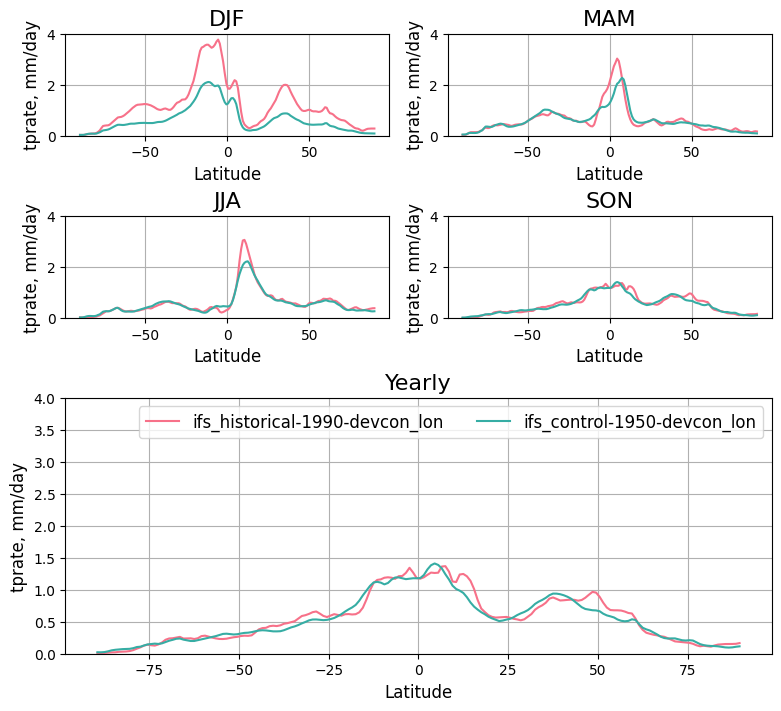

In [118]:
fig, add = None, None
for key, value in seasonal_average_lon.items():
    add = diag.plot_of_average(data=value["data"],   fig=add, figsize=0.7, new_unit=new_unit, ymax=4,
                color=value["color"],
                legend=value["label"])

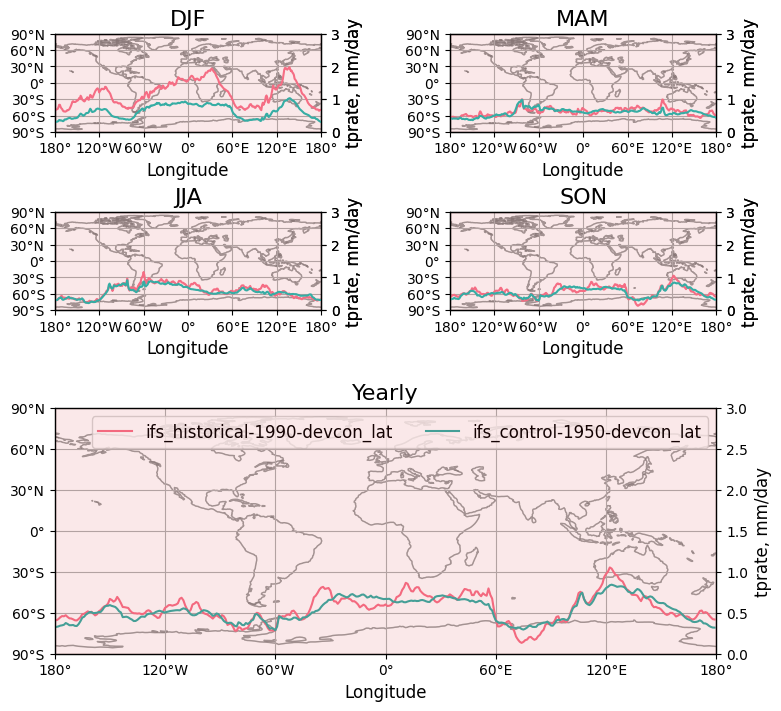

In [119]:
fig, add = None, None
for key, value in seasonal_average_lat.items():
    add = diag.plot_of_average(path_to_netcdf=value["path"],  ymax=3, fig=add, figsize=0.7, new_unit=new_unit,
                color=value["color"],
                legend=value["label"])

## 4. Calculation of a bias between climatological model and observations

Tropical-rainfall diagnostic provides the graphical representation of the bias between the mean value of precipitation of the climatological model and the mean value of observations. 

The mean value the function calculates for each season (`DJF`, `MAM`, `JJA`, `SON`) and for the total period of time. 

In [ ]:
diag.plot_bias(lra_data['historical_1990']["data"], dataset_2 = mswep_mon, seasons=True, new_unit=new_unit,  trop_lat=90,  vmin=-9, vmax=11,
               plot_title='The bias between ICON, ngc3028 and MSWEP, monthly, 1 degree res (100km)') 
               #path_to_pdf=path_to_pdf, name_of_file='icon_ngc3028_mswep_lra_r100_monthly_bias')

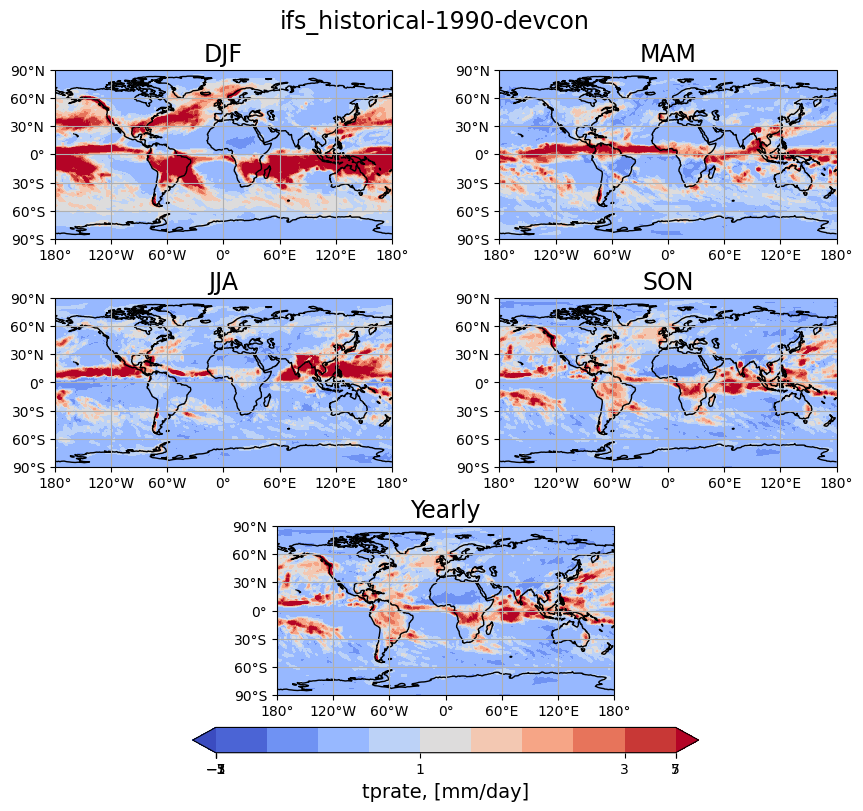

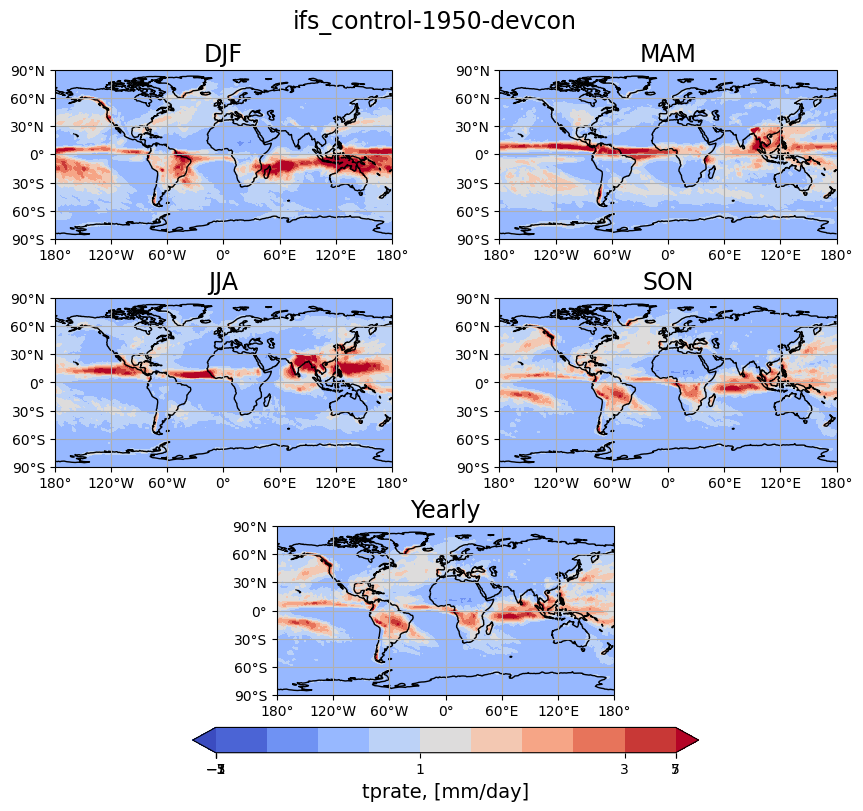

In [133]:
for key, value in lra_data.items():
    diag.plot_seasons_or_months(value["data"],  seasons=True, new_unit=new_unit, figsize=0.8, trop_lat=90,  vmin=-1, vmax=4,
               plot_title=value["label"])

#

##### The end